In [1]:
import numpy as np
import tensorflow as tf
import librosa
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()
encoder.classes_ = np.load('le.npy')
encoder.classes_

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype='<U16')

In [3]:
model = tf.keras.models.load_model('../model.h5')

In [6]:
def extract_feature_and_print_prediction(le, modelFile, file_name):
    audio_data, sample_rate = librosa.load(file_name) 
    fea = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=50)
    scaled = np.mean(fea.T,axis=0)
    pred_fea = np.array([scaled])
    pred_vector = np.argmax(modelFile.predict(pred_fea),axis=-1)
    pred_class = le.inverse_transform(pred_vector)
    print("The Predicted class is:", pred_class[0], '\n')

In [9]:
extract_feature_and_print_prediction(encoder, model, 'D:/Coding/Python/PROJECTS/Stability/Sound/fold2/100652-3-0-2.wav')

1/1 [==============================] - 0s 398ms/step
The Predicted class is: dog_bark 



In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('epoch.csv')
data['epoch'] = data.index

In [12]:
data

,loss,accuracy,val_loss,val_accuracy,epoch
0,9.8276,0.1404,2.2207,0.1671,0
1,2.4613,0.1712,2.2422,0.1402,1
2,2.1784,0.2253,2.1565,0.1568,2
3,2.0788,0.2503,2.0159,0.2152,3
4,1.9617,0.2961,1.8599,0.3080,4
...,...,...,...,...,...
95,0.7307,0.7638,0.5325,0.8489,95
96,0.7059,0.7702,0.5704,0.8271,96
97,0.7437,0.7522,0.5445,0.8346,97
98,0.7229,0.7652,0.5206,0.8437,98


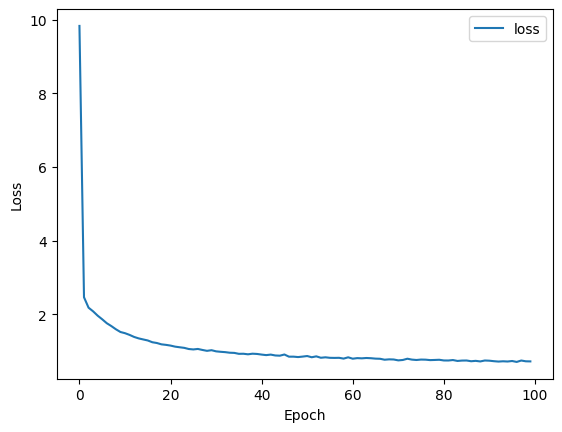

In [13]:
plt.plot(data['epoch'], data['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
data[' val_loss']

0     2.2207
1     2.2422
2     2.1565
3     2.0159
4     1.8599
       ...  
95    0.5325
96    0.5704
97    0.5445
98    0.5206
99    0.5321
Name:  val_loss, Length: 100, dtype: float64

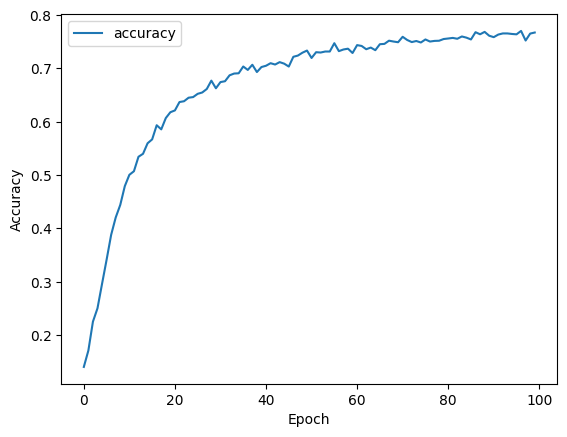

In [20]:
plt.plot(data['epoch'], data[' accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

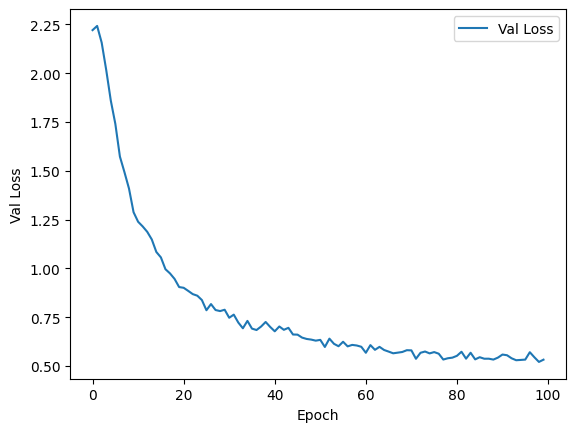

In [23]:
plt.plot(data['epoch'],data[' val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend()
plt.show()

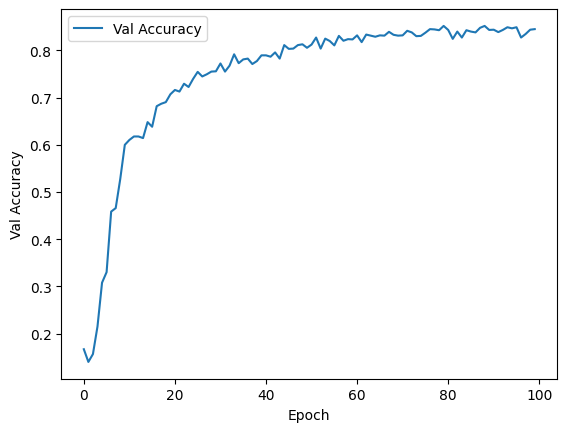

In [24]:
plt.plot(data['epoch'],data[' val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.legend()
plt.show()